In [1]:
import numpy as np
from hmc_u1 import HMC_U1
from field_transformations import manual_field_transformation
from nn_model import NNFieldTransformation
from utils import plot_results, compute_autocorrelation

In [2]:
# Parameters
""" 
total_time = n_steps * step_size should be around 1 to 2 units.
If the energy conservation is not good, try to reduce the step size.
"""

lattice_size = 16
beta = 3
n_thermalization_steps = 15000
n_steps = 20
step_size = 0.001
n_iterations = 5000

hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size)

>>> No Field Transformation


Thermalizing:   0%|          | 0/15000 [00:00<?, ?it/s]

Running HMC: 100%|██████████| 5000/5000 [00:04<00:00, 1178.06it/s]


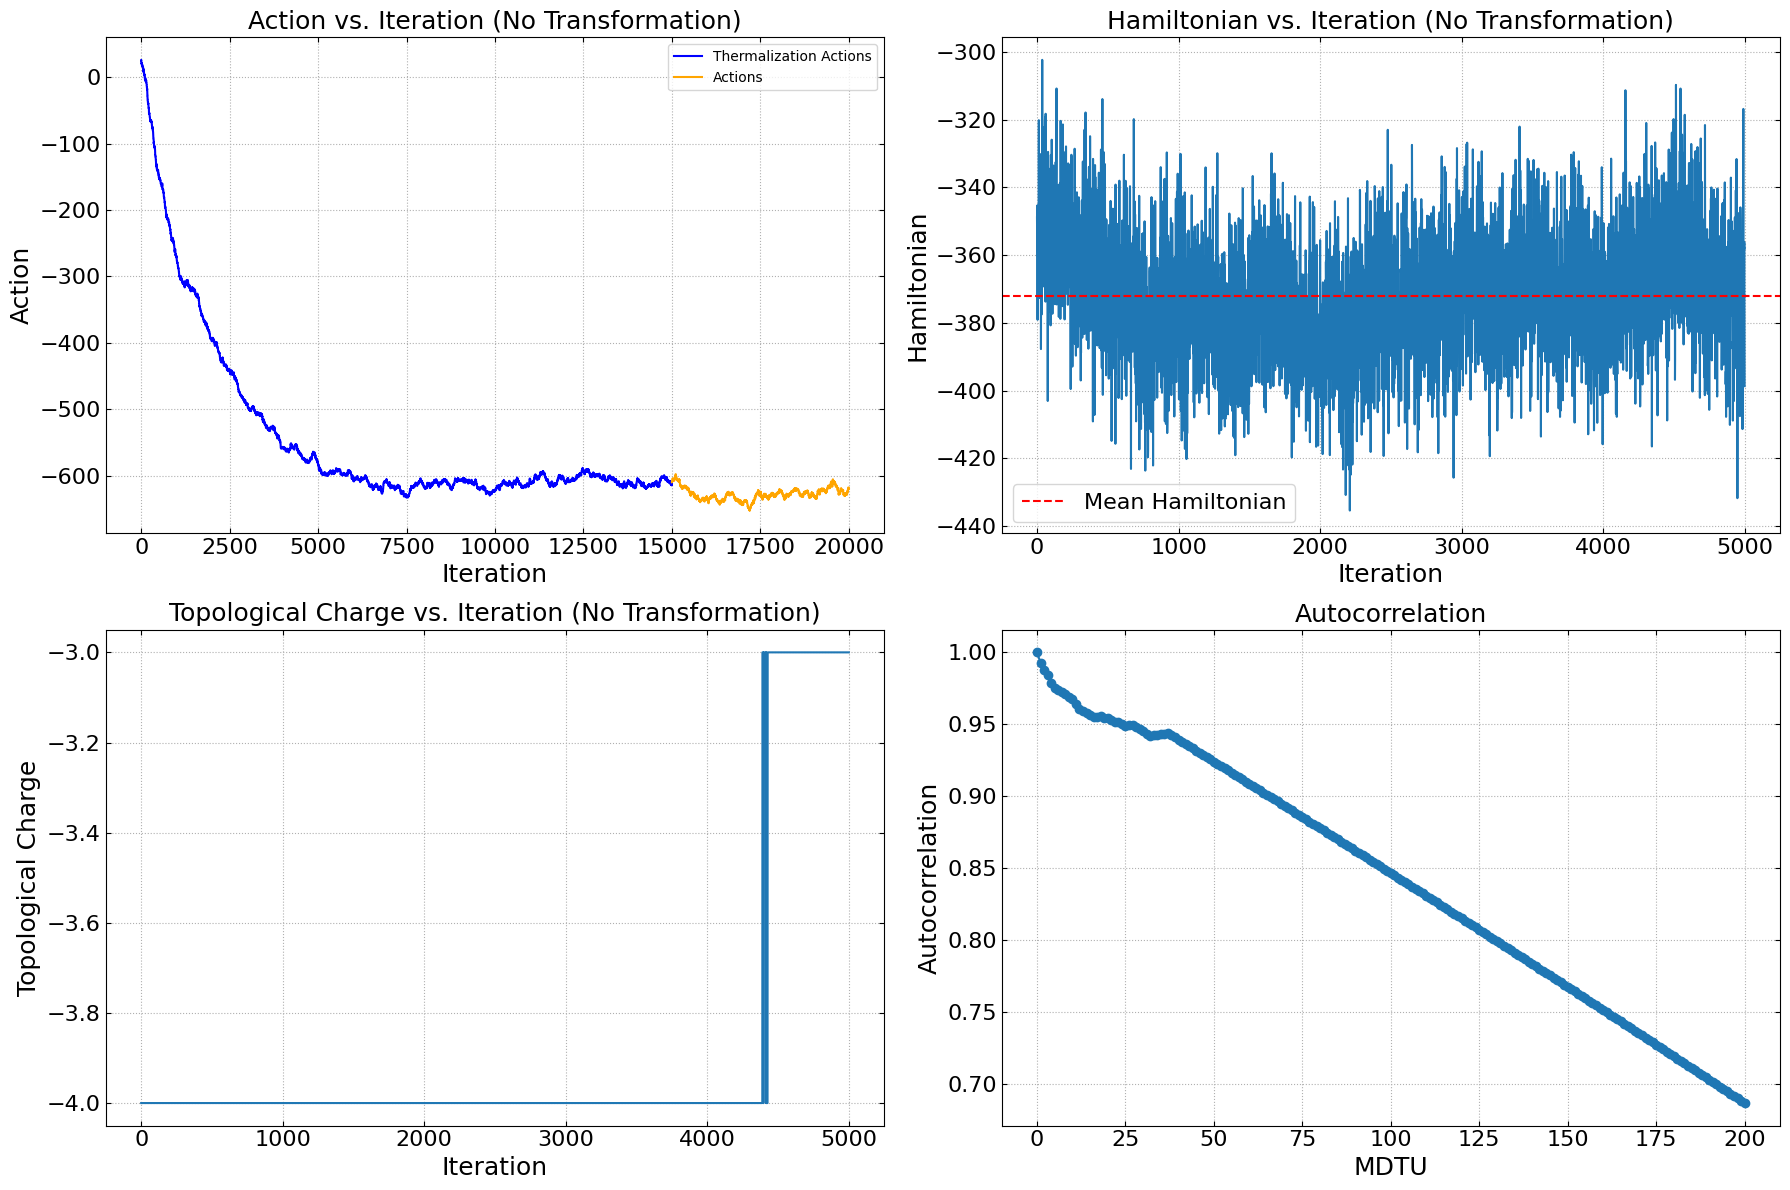

Thermalization acceptance rate: 0.4849
Acceptance rate: 0.4844
Relative variation of Hamiltonian (delta H / H_mean): -0.3575
Variation of topological charge (delta Q): 1.0000


In [3]:
print(">>> No Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(No Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

>>> Manual Field Transformation


Running HMC: 100%|██████████| 5000/5000 [00:04<00:00, 1149.59it/s]


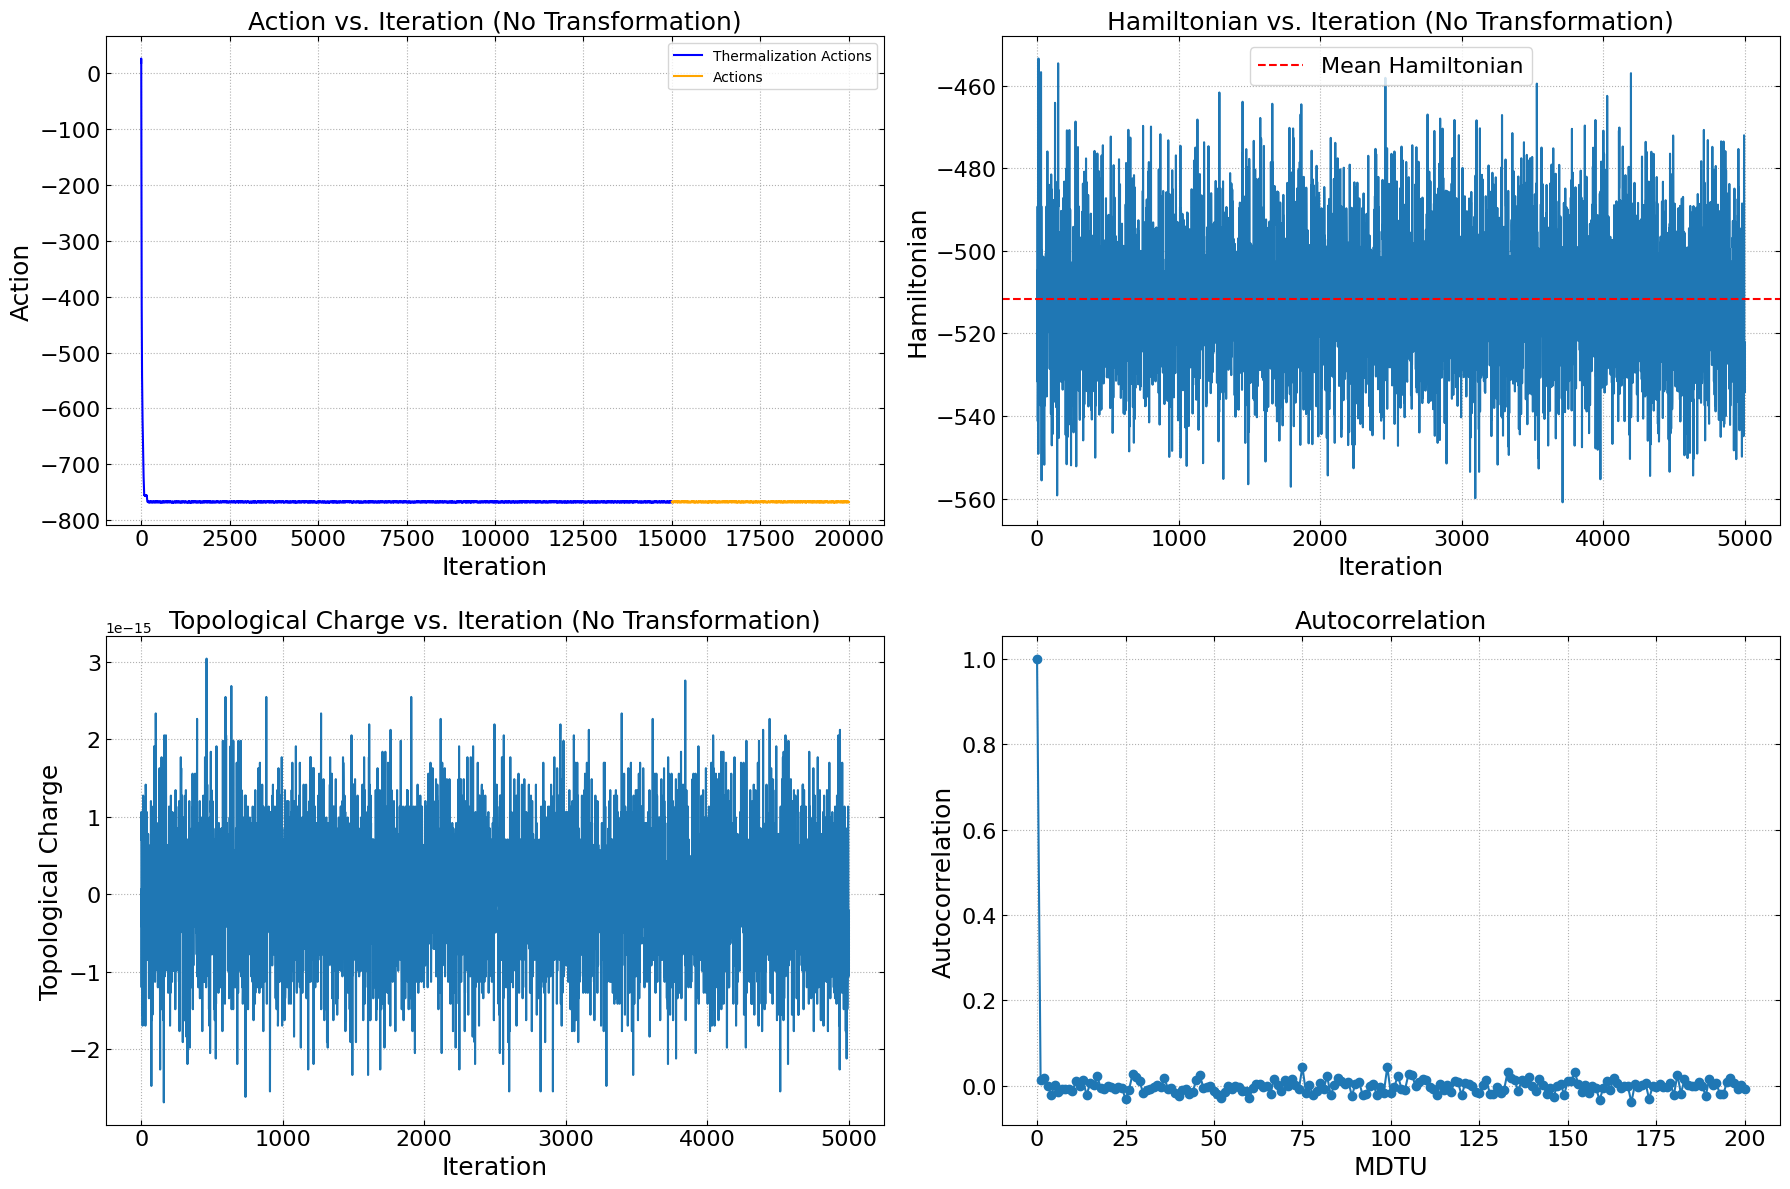

Thermalization acceptance rate: 0.5387
Acceptance rate: 0.5604
Relative variation of Hamiltonian (delta H / H_mean): -0.2102
Variation of topological charge (delta Q): 0.0000


In [4]:
print(">>> Manual Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize(field_transformation=manual_field_transformation)

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized, field_transformation=manual_field_transformation)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(No Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

>>> Neural Network Field Transformation, train force


Running HMC: 100%|██████████| 5000/5000 [00:05<00:00, 898.98it/s]


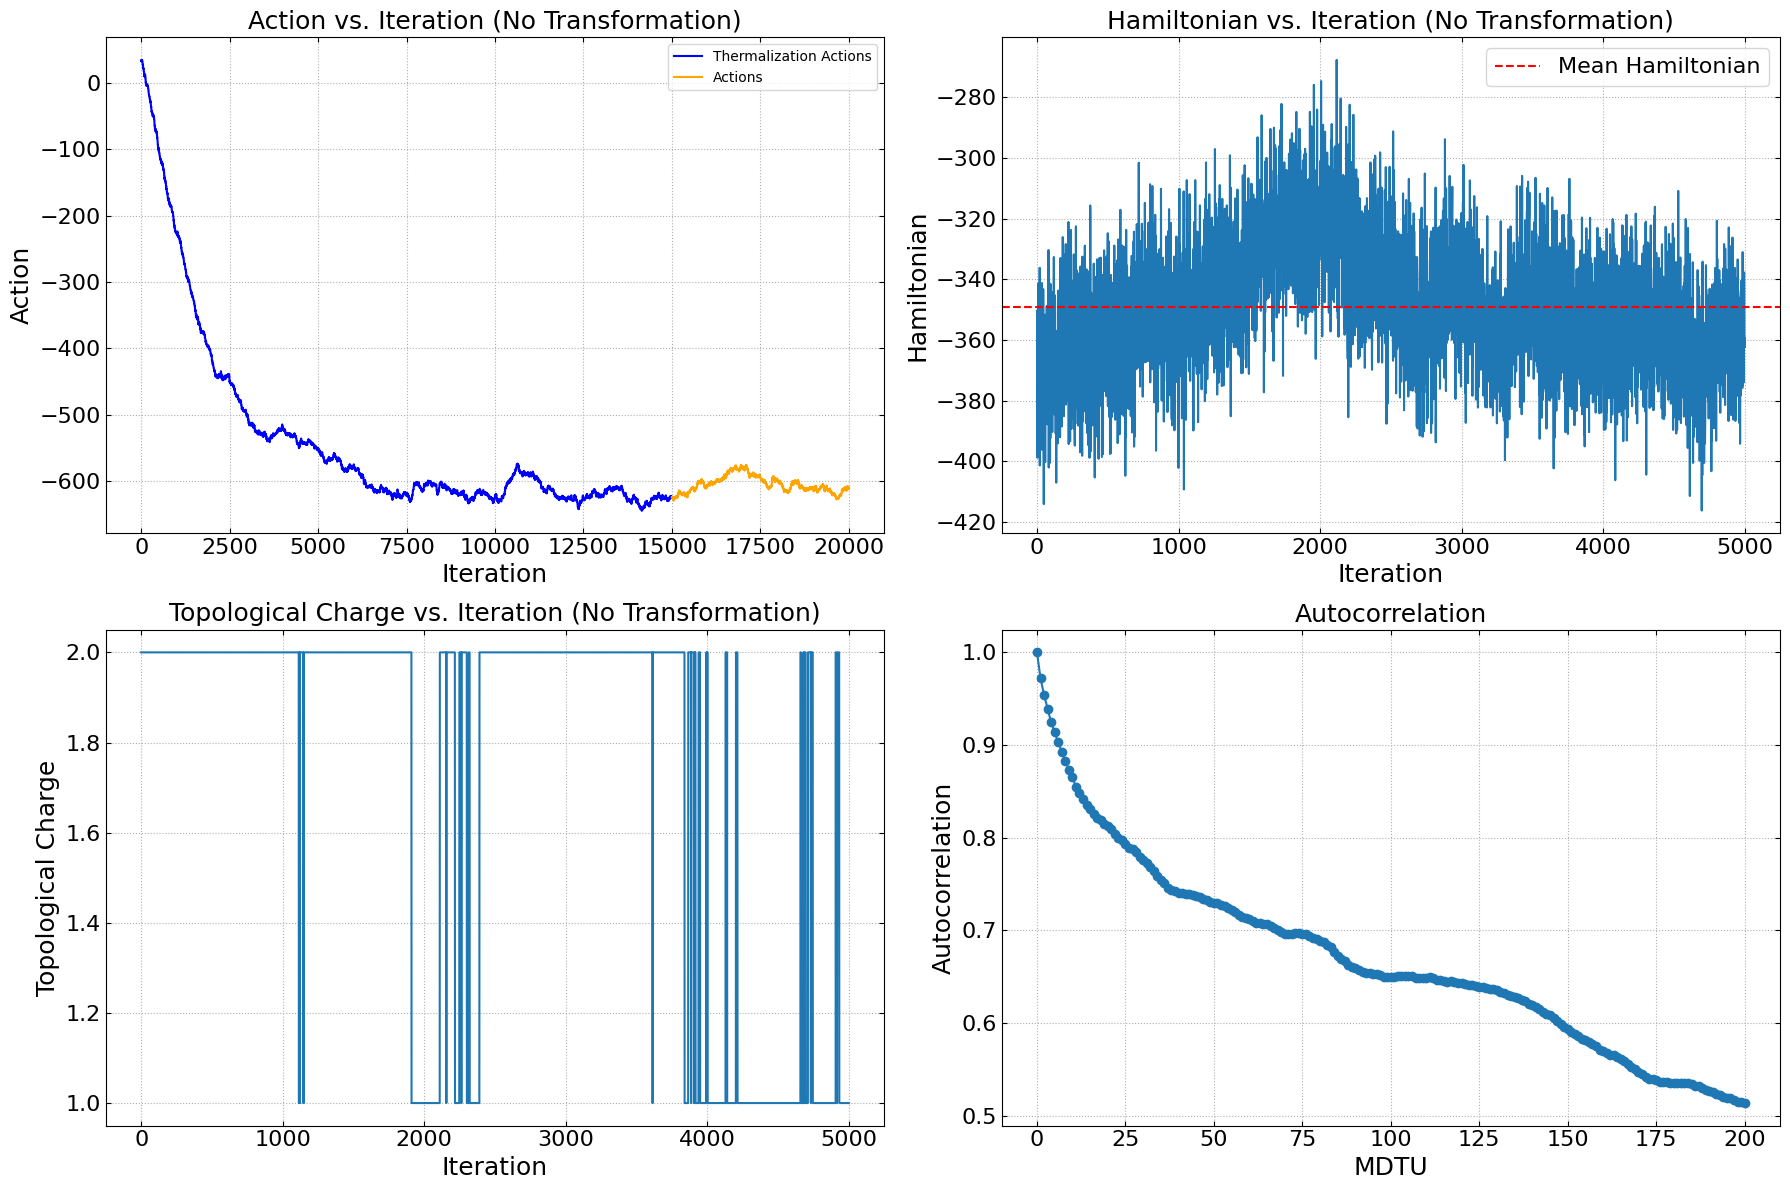

Thermalization acceptance rate: 0.4899
Acceptance rate: 0.4690
Relative variation of Hamiltonian (delta H / H_mean): -0.4253
Variation of topological charge (delta Q): 1.0000


In [6]:
print(">>> Neural Network Field Transformation, train force")

# Train the neural network force
nn_transformation = NNFieldTransformation(lattice_size)
nn_transformation.train(hmc, n_iterations=2000)

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize(field_transformation=nn_transformation)

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized, field_transformation=nn_transformation)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(No Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")